import semua library yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # Import the LogisticRegression class


C:\Users\Afit\AppData\Local\Temp\ipykernel_19836\2436398659.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## data loading

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zahidfaqih","key":"4dad116d4c7e4f28d3028d0176618678"}'}

In [3]:
!kaggle datasets download -d adityakadiwal/water-potability
!unzip water-potability.zip

Dataset URL: https://www.kaggle.com/datasets/adityakadiwal/water-potability
License(s): CC0-1.0
  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 90.8MB/s]
Archive:  water-potability.zip
  inflating: water_potability.csv    


add to csv

In [2]:
data = pd.read_csv('water_potability.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Data Preparation
pertama-tama identifikasi data shape, missing value, dan data duplikat

In [3]:
jumlah_baris, jumlah_kolom= data.shape
print("Jumlah baris:", jumlah_baris)
print("Jumlah kolom:", jumlah_kolom)
missing_values = data.isnull().sum()
print("Missing value:", missing_values.sum())
duplicate = data.duplicated().sum()
print("Jumlah data duplikat:", duplicate)
outlier = data[data['ph'] > 14].shape[0]
data.describe()

Jumlah baris: 3276
Jumlah kolom: 10
Missing value: 1434
Jumlah data duplikat: 0


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


setelah itu menghapus data missing value dan data duplikat yang ada

In [4]:
data = data.dropna()
data = data.drop_duplicates()
print("missing value:", data.isnull().sum().sum())
print("duplicate value:", data.duplicated().sum())
data.info()

missing value: 0
duplicate value: 0
<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


Mengidentifikasi apakah ada outliers dengan boxplot

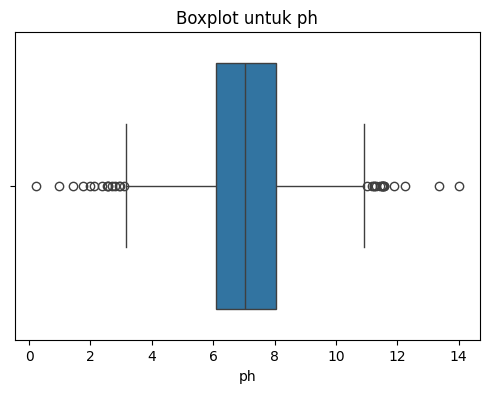

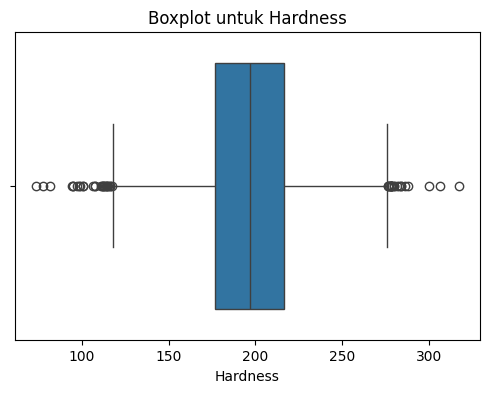

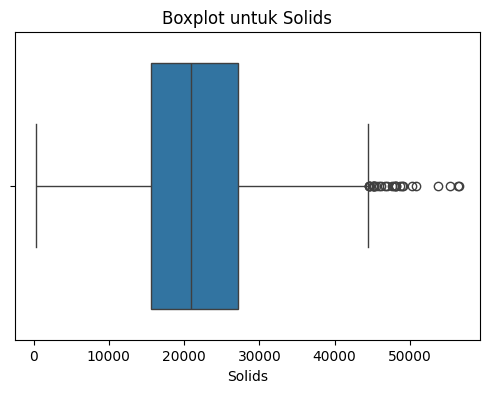

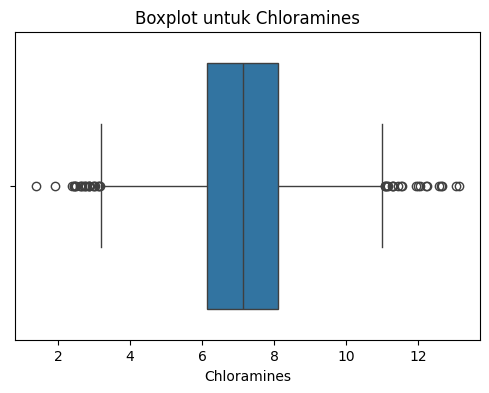

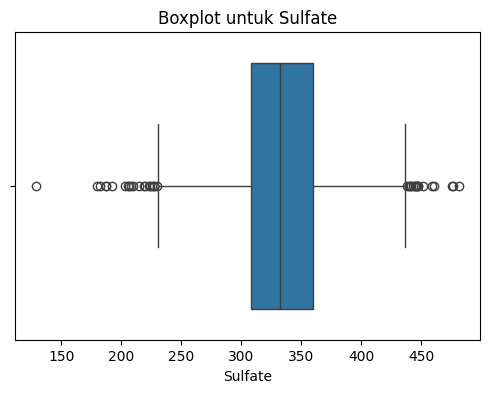

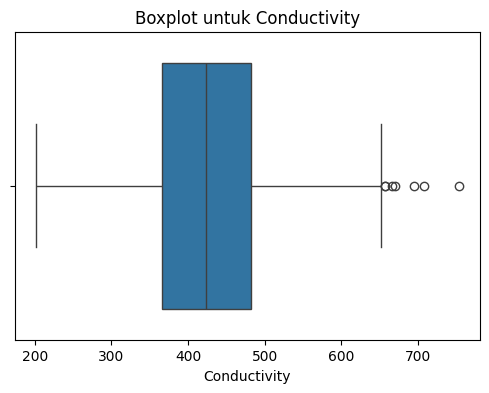

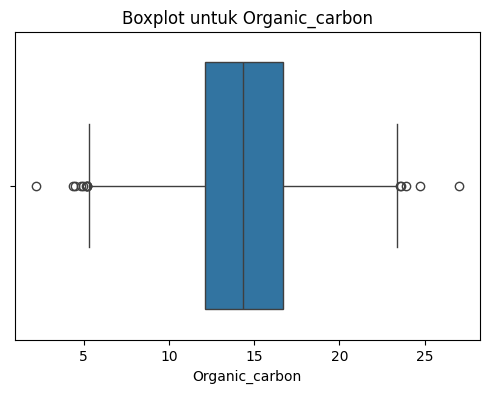

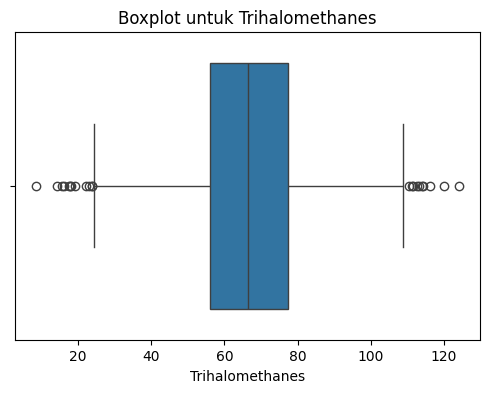

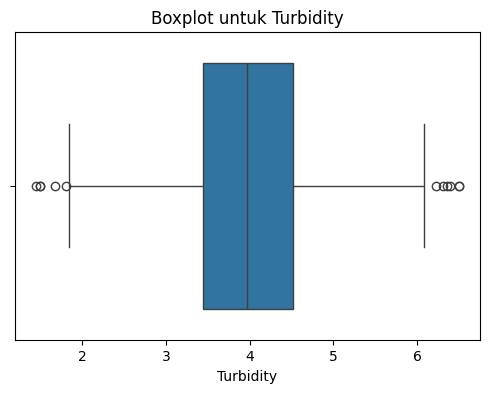

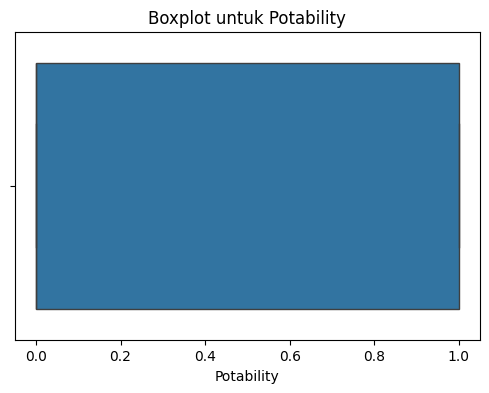

In [5]:
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot untuk {column}')
    plt.show()

pada boxplot diatas teridentifikasi banyak sekali outliers, maka kita perlu menghapus outliers dengan metode IQR.
Caranya adalah menghitung kuartil pertama (Q1) dan kuartil ke3 (Q3) dengan fungsi quantile(). IQR (Interquartile Range) dihitung sebagai selisih antara Q3 dan Q1, digunakan untuk menentukan batasan dalam mendeteksi outlier. Outliers yang diidentifikasi oleh boxplot (disebut juga "boxplot outliers") didefinisikan sebagai data yang nilainya 1.5 QR di atas Q3 atau 1.5 QR di bawah Q1. 

In [6]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1794 entries, 3 to 3270
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               1794 non-null   float64
 1   Hardness         1794 non-null   float64
 2   Solids           1794 non-null   float64
 3   Chloramines      1794 non-null   float64
 4   Sulfate          1794 non-null   float64
 5   Conductivity     1794 non-null   float64
 6   Organic_carbon   1794 non-null   float64
 7   Trihalomethanes  1794 non-null   float64
 8   Turbidity        1794 non-null   float64
 9   Potability       1794 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 154.2 KB


kemudian dilihat korelasi antar variabel dengan heatmap

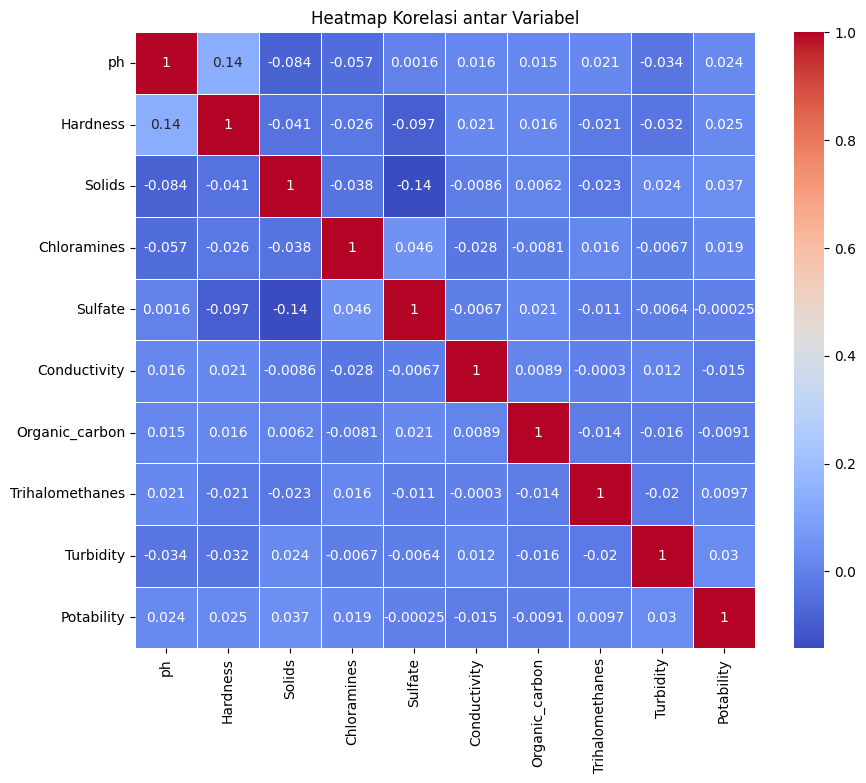

In [7]:
# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi antar Variabel')
plt.show()


pada heatmap diatas bisa dilihat bahwa korelasi antar variabel dengan potability lemah

Menlihat distribusi kelas pada target, yaitu variabel potability dengan plot

Distribusi Potability:
Potability
0    60.813824
1    39.186176
Name: proportion, dtype: float64


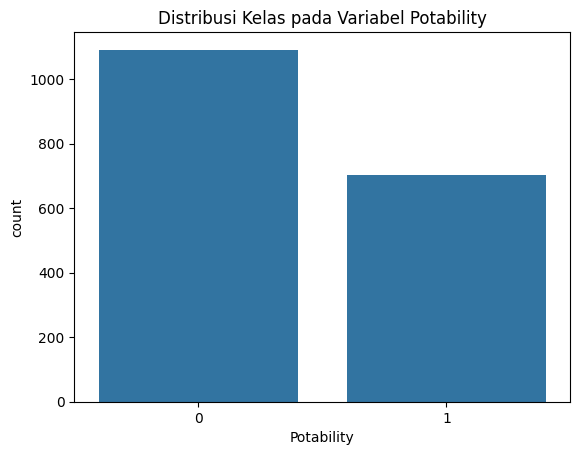

In [8]:
# Menghitung distribusi kelas pada kolom target
print("Distribusi Potability:")
print(data['Potability'].value_counts(normalize=True) * 100)

# Visualisasi distribusi kelas
sns.countplot(x='Potability', data=data)
plt.title("Distribusi Kelas pada Variabel Potability")
plt.show()

dari plot diatas didapat bahwa distribusi keals tidak seimbang.

Setelah data clear langkah selanjutnya adalah membagi fitur dengan target yaitu potability

In [9]:
x=data.drop('Potability',axis=1)
y=data['Potability']

Langkah selanjutnya adalah scaling data dengan standarscaler untuk menstandarkan atau menormalisasi fitur dalam dataset agar memiliki skala yang seragam. Dalam dataset ini, fitur-fitur memiliki rentang yang berbeda . Ini bisa membuat model lebih fokus pada fitur dengan skala yang lebih besar, sehingga mengganggu hasil model.

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

**split data menjadi train dan test**. 
Tujuannya adalah untuk menguji dan memvalidasi kinerja model secara objektif, agar model tidak hanya baik pada data pelatihan tetapi juga dapat bekerja dengan baik pada data yang tidak pernah dilihat sebelumnya.

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

## modelling dengan logistic regression dan randomforest

In [12]:
logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg.fit(x_train, y_train)
logreg.score(x_test, y_test)
y_pred_logreg = logreg.predict(x_test)

In [13]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(x_train, y_train)
rf.score(x_test, y_test)
y_pred_rf = rf.predict(x_test)

## evaluate

In [16]:
# Evaluasi untuk Logistic Regression
print("Evaluasi Model: Logistic Regression")
print("Akurasi:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("f1_score:", f1_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

print("\n" + "="*50 + "\n")

# Evaluasi untuk Random Forest Classifier
print("Evaluasi Model: Random Forest")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("f1_score:", f1_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Evaluasi Model: Logistic Regression
Akurasi: 0.4675324675324675
Precision: 0.36101083032490977
Recall: 0.47619047619047616
f1_score: 0.4106776180698152
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.46      0.51       329
           1       0.36      0.48      0.41       210

    accuracy                           0.47       539
   macro avg       0.47      0.47      0.46       539
weighted avg       0.49      0.47      0.47       539



Evaluasi Model: Random Forest
Akurasi: 0.6790352504638218
Precision: 0.6412213740458015
Recall: 0.4
f1_score: 0.49266862170087977
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.86      0.77       329
           1       0.64      0.40      0.49       210

    accuracy                           0.68       539
   macro avg       0.67      0.63      0.63       539
weighted avg       0.67      0.68      0.66       539

